# Question

Imagine you want to determine the salary you could potentially earn after a specific number of years of experience. You possess data on individuals' years of experience paired with their respective salaries. How can you utilize this data to estimate your own salary after a certain number of years of experience?

Data set: Salary_Data.csv

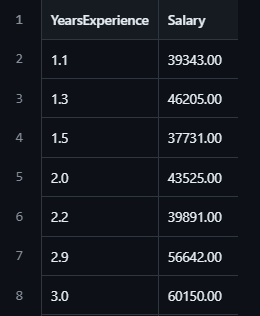

In [1]:
# Import the nessory libraries to load the dataset to python

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Loda/import the data and perform the preprocessing if required

dataset = pd.read_csv('Salary_Data.csv')

dataset.describe()

,YearsExperience,Salary
count,20.00000,20.000000
mean,4.05000,65112.450000
std,2.00932,20238.752836
min,1.10000,37731.000000
25%,2.72500,52385.000000
50%,3.80000,61684.000000
75%,5.45000,81794.250000
max,7.90000,101302.000000


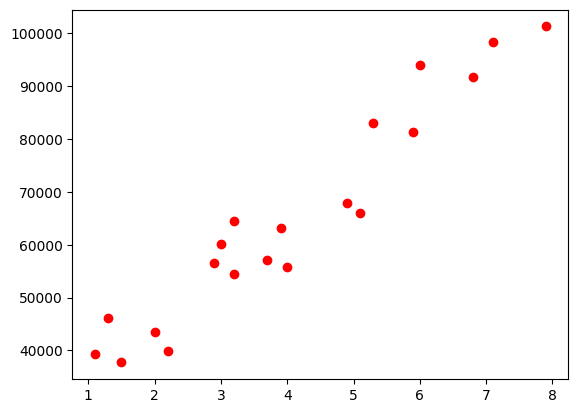

In [15]:
# Plot the data
X = dataset.iloc[:, 0].values
Y = dataset.iloc[:, 1].values

plt.scatter(X, Y, color = 'red')



* **Supervised Learning:** where the model learns from labeled data, consisting of input-output pairs.

* **Predictor Variables (Features)**: the input variables used to predict the outcome.

* **Target Variable (Response)**: the variable being predicted.

* **Regression**: it's a type of supervised learning used to predict continuous outcomes.

* **Training Data**: the dataset used to train the model.

* **Testing Data**: the dataset used to evaluate the performance of the trained model.

* **instance**: a single example or observation within a dataset.

#  Simple Linear Regression

A straight-line fit is a model of the form:
$$
\hat y = w x + b
$$
where $w$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

In machine learning, $w$ and $b$ are called as parameters. also $w$ is called as the *weight* and $b$ as *bias*.

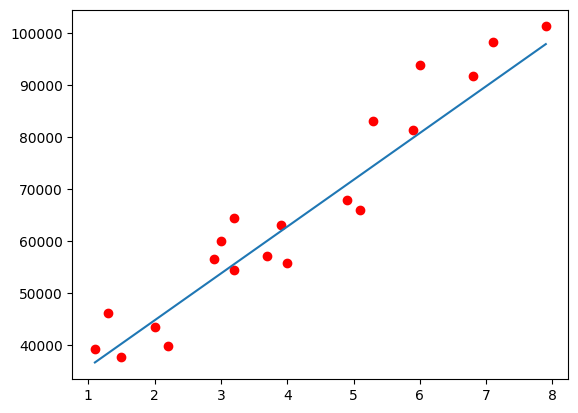

In [17]:
w = 9000 # Change different values for w and see how the line is changing
b = 26816
yy = (w*X+b)

X = dataset.iloc[:, 0].values
Y = dataset.iloc[:, 1].values

plt.scatter(X, Y, color = 'red')

plt.plot(X,yy)

## Finding the best fit line

When working with linear regression, our main goal is to find the best fit line that means the error between predicted values and actual values should be minimized. The best fit line will have the least error.



* **Residuals**: The distance between the actual value and predicted values is called residual.
* **Cost function**: A cost function in machine learning quantifies the difference between predicted and actual values, serving as the optimization objective for model training.

For Linear Regression, we use the Mean Squared Error (MSE) cost function, which is the average of squared error occurred between the predicted values and actual values. It can be written as:


$MSE(w,b) = \frac{1}{N} \sum_{i=1}^N (y_i-(wx_i+b))^2$

Where,

N=Total number of observation

$y_i$ = Actual value

($wx_i+b$)= Predicted value.

($x_i,y_i$) = Instance

In [ ]:
w = 1000
b = 26816
N = X.size
MSE = 1/N*np.sum(((w*X+b)-Y)**2)

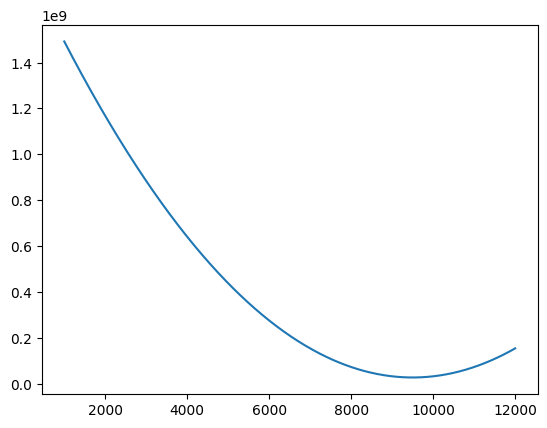

In [ ]:
# Assume that we know the intersept, which is approximatly 26816
# Now we have to find the value of slope

# MSE can be considered as a fucntion of w

w = np.linspace(1000,12000,500)
b = 26816
N = X.size
MSE =np.empty(w.shape)
for i in range(500):
  MSE[i] = 1/N*np.sum(((np.dot(X,w[i])+b)-Y)**2)

plt.plot(w,MSE)

## Gradient Descent Algorithm

Gradient Descent is an optimization algorithm used in machine learning to minimize the cost function by iteratively adjusting model parameters. It works by computing the gradient of the cost function with respect to the parameters and taking steps proportional to the negative of the gradient. This process continues until convergence, gradually approaching the optimal parameter values that minimize the cost function and improve model performance.




```
Repeat until converges:
```
$w = w -\alpha \frac{d}{dw}MSE(w) $



### Derivative of the Mean Squared Error

To find the derivative of the Mean Squared Error (MSE) with respect to \( w \), we can apply the chain rule and compute the derivative step by step.

Given the MSE function:
$ MSE(w,b) = \frac{1}{N} \sum_{i=1}^N (y_i-(wx_i+b))^2 $

Let's find $ \frac{\partial MSE}{\partial w} $:

1. Expand the square term:
$ MSE(w,b) = \frac{1}{N} \sum_{i=1}^N (y_i^2 - 2y_i(wx_i + b) + (wx_i + b)^2) $

2. Differentiate each term:
$ \frac{\partial MSE}{\partial w} = \frac{1}{N} \sum_{i=1}^N \left( 0 - 2y_i x_i + 2(wx_i + b)x_i \right) $

3. Simplify:
$ \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum_{i=1}^N \left( wx_i^2 + bx_i - y_i x_i \right) $

4. Now, let's find $ \frac{\partial MSE}{\partial b} $:

$ \frac{\partial MSE}{\partial b} = \frac{1}{N} \sum_{i=1}^N \left( 0 - 2y_i + 2(wx_i + b) \right) $

$ \frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( wx_i + b - y_i \right) $

So, the derivatives of the Mean Squared Error (MSE) with respect to $ w $ and $ b $ are:

$ \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum_{i=1}^N \left( wx_i^2 + bx_i - y_i x_i \right) $

$ \frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( wx_i + b - y_i \right) $

In [19]:
# Write a function to find the derivatives of the cost function

def compute_gradient(x,y,w,b):
  N = x.size
  dMSE_dw = (2/N)* np.sum((x*w+b-y)*x)
  return dMSE_dw


In [21]:
# Write a function to estimate the mean square error

def find_mqe(x,y,w,b):
  return 1/N*np.sum((y-(w*x+b))**2)


The value of w after 10 iteration 9967.79277424042


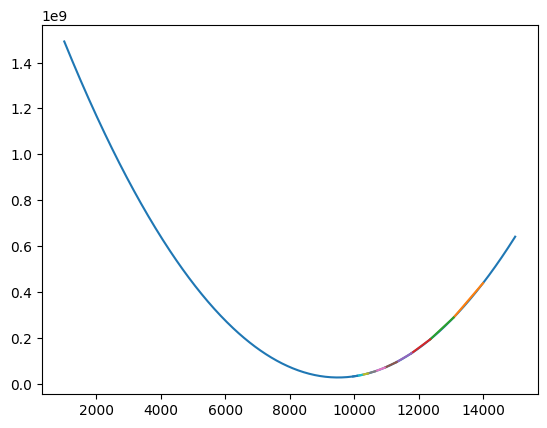

In [22]:
w = np.linspace(1000,15000,500)
b = 26816
N = X.size
MSE =np.empty(w.shape)
for i in range(500):
  MSE[i] = 1/N*np.sum((Y-(w[i]*X+b))**2)

plt.plot(w,MSE)
# Implementation of Gradient Descent Algorithm

alpha = 0.005

w = 14000
for i in range(10):
  dMSE_dw = compute_gradient(X,Y,w,b)
  w_new = w - alpha*dMSE_dw



  # only to plot in the figure
  mse = find_mqe(X,Y,w,b)
  mse_new = find_mqe(X,Y,w_new,b)
  plt.plot([w,w_new],[mse,mse_new] )
  w = w_new

print('The value of w after 10 iteration', w)



* **learning rate $\alpha$**: The learning rate in machine learning determines the size of steps taken during gradient descent optimization. It influences the speed and stability of convergence, with a higher rate leading to faster convergence but risking overshooting the optimal solution, while a lower rate may slow down convergence but ensure stability and accuracy.

* **Hyperparameter**: In machine learning, a hyperparameter is a parameter, such as the learning rate or choice of optimizer, which specifies details of the learning process, hence the name hyperparameter.

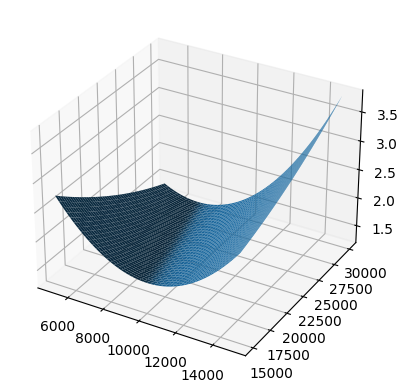

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

w = np.linspace(5000,15000,1000)
b = np.linspace(15000,30000,1000)
w,b = np.meshgrid(w,b)
N = X.size
MSE =np.empty(w.shape)
for i in range(1000):
  for j in range(1000):
    MSE[i,j] = 1/N*np.sum((X*w[i,j]+b[i,j]-Y)**2)

surf = ax.plot_surface(w, b, MSE, linewidth=0)

The value of w after  1000  iteration 9802.20747689132 25304.55599536013


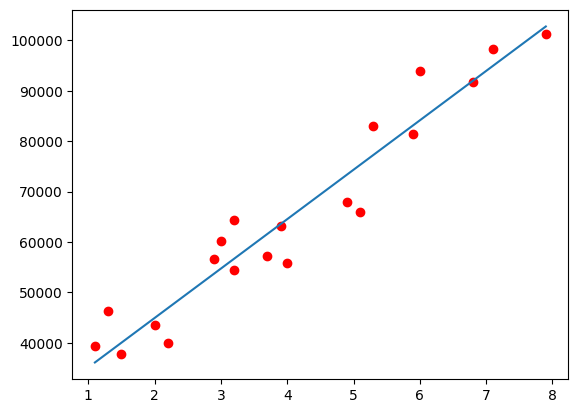

In [25]:
# Consider b is also not available and perform the simple linear regression for the given problem

# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get the data set
dataset = pd.read_csv('Salary_Data.csv')

X = dataset.iloc[:, 0].values
Y = dataset.iloc[:, 1].values

# Cost function
def cost_function(x,y,w,b):
  N = x.size
  return 1/N*np.sum(((w*x+b)-y)**2)

# Derivatives of the cost function
def compute_gradient_wb(x,y,w,b):
  N = x.size
  res = (x*w+b-y)
  dMSE_dw = (2/N)*np.sum(res*x)
  dMSE_db = (2/N)*np.sum(res)
  return dMSE_dw,dMSE_db

# Main code

alpha = 0.01   # Learning rate
w, b  = 0.5, 0.9    # initial guess of the w and b
M = 1000            # Number of iterations
# implementation of the gradient descent
for i in range(M):
  dMSE_dw,dMSE_db = compute_gradient_wb(X,Y,w,b)
  w = w - alpha*dMSE_dw
  b = b - alpha*dMSE_db


print('The value of w after ',M,' iteration', w,b)

y_predict = (w*X+b)

plt.scatter(X, Y, color = 'red')
plt.plot(X,y_predict)

w= [[9681.42419502]] 	b= [25902.68201017]


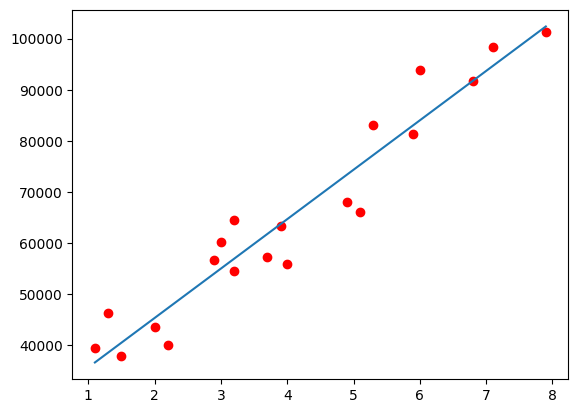

In [28]:
# Implementation of Linear Regression using sklearn library

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1:].values

regressor.fit(X, Y)

w = regressor.coef_
b = regressor.intercept_

y_predict = (w*X+b)
print('w=',w,'\tb=',b)


plt.scatter(X, Y, color = 'red')
plt.plot(X,y_predict)

# sklearn
ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Model Performance

The Goodness of fit determines how the line of regression fits the set of observations.


1.   R-squared method:


> *   R-squared is a statistical method that determines the goodness of fit.
> * It measures the strength of the relationship between the dependent and independent variables on a scale of 0-100%.
> * The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model.
> * It is also called a coefficient of determination, or coefficient of multiple determination for multiple regression.
> * It can be calculated from the below formula:






$R^2 = 1-\frac{SSR}{SST}$
$ = 1-\frac{\sum(y_i - \hat y_i )^2}{\sum( y_i - \bar y)^2}$

In [32]:
ssr = np.sum((Y - y_predict)**2)

sst = np.sum((Y-np.mean(Y))**2)

R2 = 1 - ssr/sst
print(R2)

0.9238668563268385


Final parameters: w0 = 25304.548193530914 w1 = 9802.209052362901
0.923691272953156


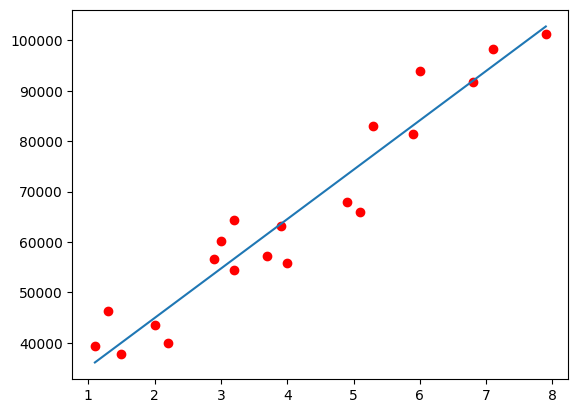

In [36]:
# Another Way to implement

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

# Initialize parameters
w0, w1 = np.random.rand(), np.random.rand()

# Gradient descent
learning_rate = 0.02
num_iterations = 1000
for _ in range(num_iterations):
    y_pred = w0 + w1 * X
    gradient_w0 = np.mean(y_pred - y)
    gradient_w1 = np.mean((y_pred - y) * X)
    w0 -= learning_rate * gradient_w0
    w1 -= learning_rate * gradient_w1

print("Final parameters: w0 =", w0, "w1 =", w1)

plt.scatter(X, y, color = 'red')
plt.plot(X,y_pred)

# R2
ssr = np.sum((y - y_pred)**2)
sst = np.sum((y-np.mean(y))**2)

R2 = 1 - ssr/sst
print(R2)